# Problem 1


### 1

$$
o_i = \frac{\exp(v_i)}{\sum_{j=1}^k \exp(v_j)} \quad \forall i \in \{1, \dots, k\}.
$$

Case $i = j$:
$$
\frac{\partial o_i}{\partial v_j} = \frac{\exp(v_i) \cdot \sum_{j=1}^k \exp(v_j) - \exp(v_i) \cdot \exp(v_i)}{\left(\sum_{j=1}^k \exp(v_j)\right)^2}.
$$

$$
\frac{\partial o_i}{\partial v_j} = \frac{\exp(v_i) \left(\sum_{j=1}^k \exp(v_j) - \exp(v_i)\right)}{\left(\sum_{j=1}^k \exp(v_j)\right)^2}.
$$


$$
\frac{\partial o_i}{\partial v_j} = \frac{\exp(v_i)}{\left(\sum_{j=1}^k \exp(v_j)\right)} ( \frac{\left(\sum_{j=1}^k \exp(v_j)\right)}{\left(\sum_{j=1}^k \exp(v_j)\right)} - \frac{\exp(v_i)}{\left(\sum_{j=1}^k \exp(v_j)\right)}).
$$

$$
\frac{\partial o_i}{\partial v_j} = o_i (1 - o_i)
$$

case $i \neq j$:
$$
\frac{\partial o_i}{\partial v_j} = \frac{0 \cdot \sum_{j=1}^k \exp(v_j) - \exp(v_i) \cdot \exp(v_j)}{\left(\sum_{j=1}^k \exp(v_j)\right)^2}.
$$

$$
\frac{\partial o_i}{\partial v_j} = \frac{- \exp(v_i) \cdot \exp(v_j)}{\left(\sum_{j=1}^k \exp(v_j)\right)^2}.
$$

$$
\frac{\partial o_i}{\partial v_j} = \frac{- \exp(v_i) }{\left(\sum_{j=1}^k \exp(v_j)\right)}\frac{ \exp(v_j) }{\left(\sum_{j=1}^k \exp(v_j)\right)}.
$$

$$
\frac{\partial o_i}{\partial v_j} = -o_i o_j.
$$

### 2
$L = -\sum_{i=1}^k y_i \log(o_i)$


$$
\frac{\partial L}{\partial v_i} = \sum_{i=1}^k \frac{\partial L}{\partial o_j} \cdot \frac{\partial o_j}{\partial v_i}.
$$

$$
\frac{\partial L}{\partial v_i} = \sum_{i=1}^k -\frac{y_i}{o_i} \cdot \frac{\partial o_j}{\partial v_i}.
$$

case $i=j$:
$$
-\frac{y_i}{o_i} \cdot o_i (1 - o_i) = -y_i (1 - o_i).
$$

case $i \neq j$:
$$
y_i = 0
$$

Then:
$$
\frac{\partial L}{\partial v_i} = o_i - y_i.
$$

# Question 2

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.io import loadmat
%matplotlib inline

data = loadmat('ex3data1.mat')
data

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Sun Oct 16 13:09:09 2011',
 '__version__': '1.0',
 '__globals__': [],
 'X': array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 'y': array([[10],
        [10],
        [10],
        ...,
        [ 9],
        [ 9],
        [ 9]], dtype=uint8)}

In [ ]:
X = data['X']
y = data['y']

X.shape, y.shape

((5000, 400), (5000, 1))

In [ ]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)
y_onehot = encoder.fit_transform(y)
y_onehot.shape

(5000, 10)

In [ ]:
y[0], y_onehot[0,:]

(array([10], dtype=uint8), array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]))

### 1 sigmoid() to return scaled sigmoid.

In [ ]:
def sigmoid(z):
    return 1 / (1 + np.exp(-2*z))

### 2 forward propagate() to account for 2 hidden layers (the original has one hidden layer).

In [ ]:
def forward_propagate(X, theta1, theta2, theta3):
    m = X.shape[0]
    # activation of the input layer
    a1 = np.insert(X, 0, values=np.ones(m), axis=1)
    # weighted sum of inputs for the first hidden layer
    z2 = a1 * theta1.T
    a2 = np.insert(sigmoid(z2), 0, values=np.ones(m), axis=1)
    # second hidden layer
    z3 = a2 * theta2.T
    a3 = np.insert(sigmoid(z3), 0, values=np.ones(m), axis=1)
    z4 = a3 * theta3.T
    h = sigmoid(z4)

    return a1, z2, a2, z3, a3, z4, h

### 3 cost() to calculate predictions from the 3-layered neural network and hence the cost. You need to make changes to both versions of the cost() function, with and without regularization, as in the original notebook.

In [ ]:
def cost(params, input_size, hidden_size1, hidden_size2, num_labels, X, y, learning_rate):
    m = X.shape[0]
    X = np.matrix(X)
    y = np.matrix(y)

    # reshape the parameter array into parameter matrices for each layer
    theta1_end = hidden_size1 * (input_size + 1)
    theta2_end = theta1_end + hidden_size2 * (hidden_size1 + 1)
    theta1 = np.matrix(np.reshape(params[:theta1_end], (hidden_size1, (input_size + 1))))
    theta2 = np.matrix(np.reshape(params[theta1_end:theta2_end], (hidden_size2, (hidden_size1 + 1))))
    theta3 = np.matrix(np.reshape(params[theta2_end:], (num_labels, (hidden_size2 + 1))))
    # run the feed-forward pass
    a1, z2, a2, z3, a3, z4, h = forward_propagate(X, theta1, theta2, theta3)

    # compute the cost
    J = 0
    for i in range(m):
        first_term = np.multiply(-y[i,:], np.log(h[i,:]))
        second_term = np.multiply((1 - y[i,:]), np.log(1 - h[i,:]))
        J += np.sum(first_term - second_term)

    J = J / m

    return J

In [ ]:
# initial setup
input_size = 400
hidden_size1 = 20
hidden_size2 = 20
num_labels = 10
learning_rate = 1

# randomly initialize a parameter array of the size of the full network's parameters
params = (np.random.random(size=hidden_size1 * (input_size + 1) +
                           hidden_size2 * (hidden_size1 + 1)+
                           num_labels * (hidden_size2 + 1)) - 0.5) * 0.25

m = X.shape[0]
X = np.matrix(X)
y = np.matrix(y)

theta1_end = hidden_size1 * (input_size + 1)
theta2_end = theta1_end + hidden_size2 * (hidden_size1 + 1)

theta1 = np.matrix(np.reshape(params[:theta1_end], (hidden_size1, (input_size + 1))))
theta2 = np.matrix(np.reshape(params[theta1_end:theta2_end], (hidden_size2, (hidden_size1 + 1))))
theta3 = np.matrix(np.reshape(params[theta2_end:], (num_labels, (hidden_size2 + 1))))

theta1.shape, theta2.shape, theta3.shape

((20, 401), (20, 21), (10, 21))

In [ ]:
a1, z2, a2, z3, a3, z4, h = forward_propagate(X, theta1, theta2, theta3)
a1.shape, z2.shape, a2.shape, z3.shape, a3.shape, z4.shape, h.shape

((5000, 401),
 (5000, 20),
 (5000, 21),
 (5000, 20),
 (5000, 21),
 (5000, 10),
 (5000, 10))

In [ ]:
cost(params, input_size, hidden_size1, hidden_size2, num_labels, X, y, learning_rate)

88.2358598712826

In [ ]:
def cost(params, input_size, hidden_size, num_labels, X, y, learning_rate):
    m = X.shape[0]
    X = np.matrix(X)
    y = np.matrix(y)

    # reshape the parameter array into parameter matrices for each layer
    theta1_end = hidden_size1 * (input_size + 1)
    theta2_end = theta1_end + hidden_size2 * (hidden_size1 + 1)
    theta1 = np.matrix(np.reshape(params[:theta1_end], (hidden_size1, (input_size + 1))))
    theta2 = np.matrix(np.reshape(params[theta1_end:theta2_end], (hidden_size2, (hidden_size1 + 1))))
    theta3 = np.matrix(np.reshape(params[theta2_end:], (num_labels, (hidden_size2 + 1))))
    # run the feed-forward pass
    a1, z2, a2, z3, a3, z4, h = forward_propagate(X, theta1, theta2, theta3)
    # compute the cost
    J = 0
    for i in range(m):
        first_term = np.multiply(-y[i,:], np.log(h[i,:]))
        second_term = np.multiply((1 - y[i,:]), np.log(1 - h[i,:]))
        J += np.sum(first_term - second_term)

    J = J / m

    # add the cost regularization term
    J += (float(learning_rate) / (2 * m)) * (np.sum(np.power(theta1[:,1:], 2)) + np.sum(np.power(theta2[:,1:], 2))
                                             + np.sum(np.power(theta3[:, 1:], 2)))

    return J

In [ ]:
cost(params, input_size, hidden_size, num_labels, X, y_onehot, learning_rate)

7.5003540511787845

### 4 sigmoid gradient() to return gradient of scaled sigmoid function.

In [ ]:
def sigmoid_gradient(z):
    return 2* np.multiply(sigmoid(z), (1 - sigmoid(z)))

### 5. backprop() to compute the gradients. Your function should return both the cost and the gradient vector, as in the original notebook. Also, you will need to implement two versions of these functions, with and without regularization, as in the original notebook.


In [ ]:
def backprop(params, input_size, hidden_size1, hidden_size2, num_labels, X, y, learning_rate):
    m = X.shape[0]
    X = np.matrix(X)
    y = np.matrix(y)

   # reshape the parameter array into parameter matrices for each layer
    theta1_end = hidden_size1 * (input_size + 1)
    theta2_end = theta1_end + hidden_size2 * (hidden_size1 + 1)
    theta1 = np.matrix(np.reshape(params[:theta1_end], (hidden_size1, (input_size + 1))))
    theta2 = np.matrix(np.reshape(params[theta1_end:theta2_end], (hidden_size2, (hidden_size1 + 1))))
    theta3 = np.matrix(np.reshape(params[theta2_end:], (num_labels, (hidden_size2 + 1))))
    # run the feed-forward pass
    a1, z2, a2, z3, a3, z4, h = forward_propagate(X, theta1, theta2, theta3)

    # initializations
    J = 0
    delta1 = np.zeros(theta1.shape)  # (25, 401)
    delta2 = np.zeros(theta2.shape)  # (10, 26)
    delta3 = np.zeros(theta3.shape)

    # compute the cost
    for i in range(m):
        first_term = np.multiply(-y[i,:], np.log(h[i,:]))
        second_term = np.multiply((1 - y[i,:]), np.log(1 - h[i,:]))
        J += np.sum(first_term - second_term)

    J = J / m

    # add the cost regularization term
    J += (float(learning_rate) / (2 * m)) * (np.sum(np.power(theta1[:,1:], 2)) + np.sum(np.power(theta2[:,1:], 2))
                                            + np.sum(np.power(theta3[:, 1:], 2)))

    # perform backpropagation
    for t in range(m):
        a1t = a1[t, :]     # (1, 401)
        z2t = z2[t, :]     # (1, 20)
        a2t = a2[t, :]     # (1, 21)
        z3t = z3[t, :]     # (1, 20)
        a3t = a3[t, :]     # (1, 21)
        ht = h[t, :]       # (1, 10)
        yt = y[t, :]       # (1, 10)

        d4t = ht - yt

        z3t = np.insert(z3t, 0, values=np.ones(1))
        d3t = np.multiply((theta3.T * d4t.T).T, sigmoid_gradient(z3t))

        z2t = np.insert(z2t, 0, values=np.ones(1))
        d2t = np.multiply((theta2.T * d3t[:,1:].T).T, sigmoid_gradient(z2t))

        delta1 = delta1 + (d2t[:,1:]).T * a1t
        delta2 = delta2 + (d3t[:,1:]).T * a2t
        delta3 = delta3 + d4t.T * a3t


    delta1 = delta1 / m
    delta2 = delta2 / m
    delta3 = delta3 / m

    # unravel the gradient matrices into a single array
    grad = np.concatenate((np.ravel(delta1), np.ravel(delta2), np.ravel(delta3)))

    return J, grad

In [ ]:
J, grad = backprop(params, input_size, hidden_size1, hidden_size2, num_labels, X, y, learning_rate)
J, grad.shape

(88.2402748448745, (8650,))

In [ ]:
def backprop(params, input_size, hidden_size1, hidden_size2, num_labels, X, y, learning_rate):
    m = X.shape[0]
    X = np.matrix(X)
    y = np.matrix(y)

   # reshape the parameter array into parameter matrices for each layer
    theta1_end = hidden_size1 * (input_size + 1)
    theta2_end = theta1_end + hidden_size2 * (hidden_size1 + 1)
    theta1 = np.matrix(np.reshape(params[:theta1_end], (hidden_size1, (input_size + 1))))
    theta2 = np.matrix(np.reshape(params[theta1_end:theta2_end], (hidden_size2, (hidden_size1 + 1))))
    theta3 = np.matrix(np.reshape(params[theta2_end:], (num_labels, (hidden_size2 + 1))))
    # run the feed-forward pass
    a1, z2, a2, z3, a3, z4, h = forward_propagate(X, theta1, theta2, theta3)

    # initializations
    J = 0
    delta1 = np.zeros(theta1.shape)  # (25, 401)
    delta2 = np.zeros(theta2.shape)  # (10, 26)
    delta3 = np.zeros(theta3.shape)

    # compute the cost
    for i in range(m):
        first_term = np.multiply(-y[i,:], np.log(h[i,:]))
        second_term = np.multiply((1 - y[i,:]), np.log(1 - h[i,:]))
        J += np.sum(first_term - second_term)

    J = J / m

    # add the cost regularization term
    J += (float(learning_rate) / (2 * m)) * (np.sum(np.power(theta1[:,1:], 2)) + np.sum(np.power(theta2[:,1:], 2))
                                            + np.sum(np.power(theta3[:, 1:], 2)))

    # perform backpropagation
    for t in range(m):
        a1t = a1[t, :]     # (1, 401)
        z2t = z2[t, :]     # (1, 20)
        a2t = a2[t, :]     # (1, 21)
        z3t = z3[t, :]     # (1, 20)
        a3t = a3[t, :]     # (1, 21)
        ht = h[t, :]       # (1, 10)
        yt = y[t, :]       # (1, 10)

        d4t = ht - yt

        z3t = np.insert(z3t, 0, values=np.ones(1))
        d3t = np.multiply((theta3.T * d4t.T).T, sigmoid_gradient(z3t))

        z2t = np.insert(z2t, 0, values=np.ones(1))
        d2t = np.multiply((theta2.T * d3t[:,1:].T).T, sigmoid_gradient(z2t))

        delta1 = delta1 + (d2t[:,1:]).T * a1t
        delta2 = delta2 + (d3t[:,1:]).T * a2t
        delta3 = delta3 + d4t.T * a3t


    delta1 = delta1 / m
    delta2 = delta2 / m
    delta3 = delta3 / m

    # add the gradient regularization term
    delta1[:,1:] = delta1[:,1:] + (theta1[:,1:] * learning_rate) / m
    delta2[:,1:] = delta2[:,1:] + (theta2[:,1:] * learning_rate) / m
    delta3[:,1:] = delta3[:,1:] + (theta3[:,1:] * learning_rate) / m

    # unravel the gradient matrices into a single array
    grad = np.concatenate((np.ravel(delta1), np.ravel(delta2), np.ravel(delta3)))

    return J, grad

In [ ]:
J, grad = backprop(params, input_size, hidden_size1, hidden_size2, num_labels, X, y, learning_rate)
J, grad.shape

(88.2402748448745, (8650,))

### 6. Train your 3-layered neural network by minimizing the objective function, as in the original notebook, keeping the hyperparameters (learning rate, method, jac, options) unchanged.

In [ ]:
from scipy.optimize import minimize

fmin = minimize(fun=backprop, x0=params,
                args=(input_size, hidden_size1, hidden_size2, num_labels, X, y_onehot, learning_rate),
                method='TNC', jac=True, options={'maxiter': 250})
fmin

/var/folders/lp/m8ck1h455hd24834n0mwd8f40000gn/T/ipykernel_62579/2088718212.py:3: OptimizeWarning: Unknown solver options: maxiter
  fmin = minimize(fun=backprop, x0=params,


 message: Converged (|f_n-f_(n-1)| ~= 0)
 success: True
  status: 1
     fun: 0.09710709279093768
       x: [ 4.739e-01 -1.224e-05 ...  7.784e-01  6.732e-01]
     nit: 54
     jac: [-9.017e-05 -2.449e-09 ...  4.493e-06  6.806e-06]
    nfev: 1198

In [ ]:
X = np.matrix(X)
theta1_end = hidden_size1 * (input_size + 1)
theta2_end = theta1_end + (hidden_size2 * (hidden_size1 + 1))

theta1 = np.matrix(np.reshape(fmin.x[:theta1_end], (hidden_size1, input_size + 1)))
theta2 = np.matrix(np.reshape(fmin.x[theta1_end:theta2_end], (hidden_size2, hidden_size1 + 1)))
theta3 = np.matrix(np.reshape(fmin.x[theta2_end:], (num_labels, hidden_size2 + 1)))

a1, z2, a2, z3, a3, z4, h = forward_propagate(X, theta1, theta2, theta3)

y_pred = np.array(np.argmax(h, axis=1) + 1)
y_pred

array([[10],
       [10],
       [10],
       ...,
       [ 9],
       [ 9],
       [ 9]])

### 7. Make forward predictions from your trained model and compute the accuracy.

In [ ]:
correct = [1 if a == b else 0 for (a, b) in zip(y_pred, y)]
accuracy = (sum(map(int, correct)) / float(len(correct)))
print('accuracy = {0}%'.format(accuracy * 100))

accuracy = 100.0%


### 8 How does your model accuracy compare with the accuracy of the 2-layered neural network in the original notebook? (2)

The accuracy of 2 layered neural network is 99.22% while mine is 100% which is higher.

# Problem 3

### 1. Explain the vanishing gradients phenomenon using RandomNormal initialization with three different values of standard deviation. You will conduct two groups of experiments: train the model with tanh and sigmoid activation functions. For each group of experiments, you should have one plot containing 3 subplots of gradients at each of the 5 layers in the neural network, which is similar to the plots in the blog post. Summerise and explain your observations. (6)

In [ ]:
import keras
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from keras import initializers
from keras.datasets import mnist
import tensorflow as tf
from util import (
    compile_model,
    create_mlp_model,
    get_gradients,
    grid_axes_it,
)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
<ipython-input-13-7b08fa716598>:70: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='count'` for the same effect.
  sns.violinplot(x='Hidden Layer', y='Output', data=ddf, ax=ax, scale='count', inner=None)
<ipython-input-13-7b08fa716598>:70: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='count'` for the same effect.
  sns.violinplot(x='Hidden Layer', y='Output', data=ddf, ax=ax, scale='count', inner=None)
<ipython-input-13-7b08fa716598>:70: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_nor

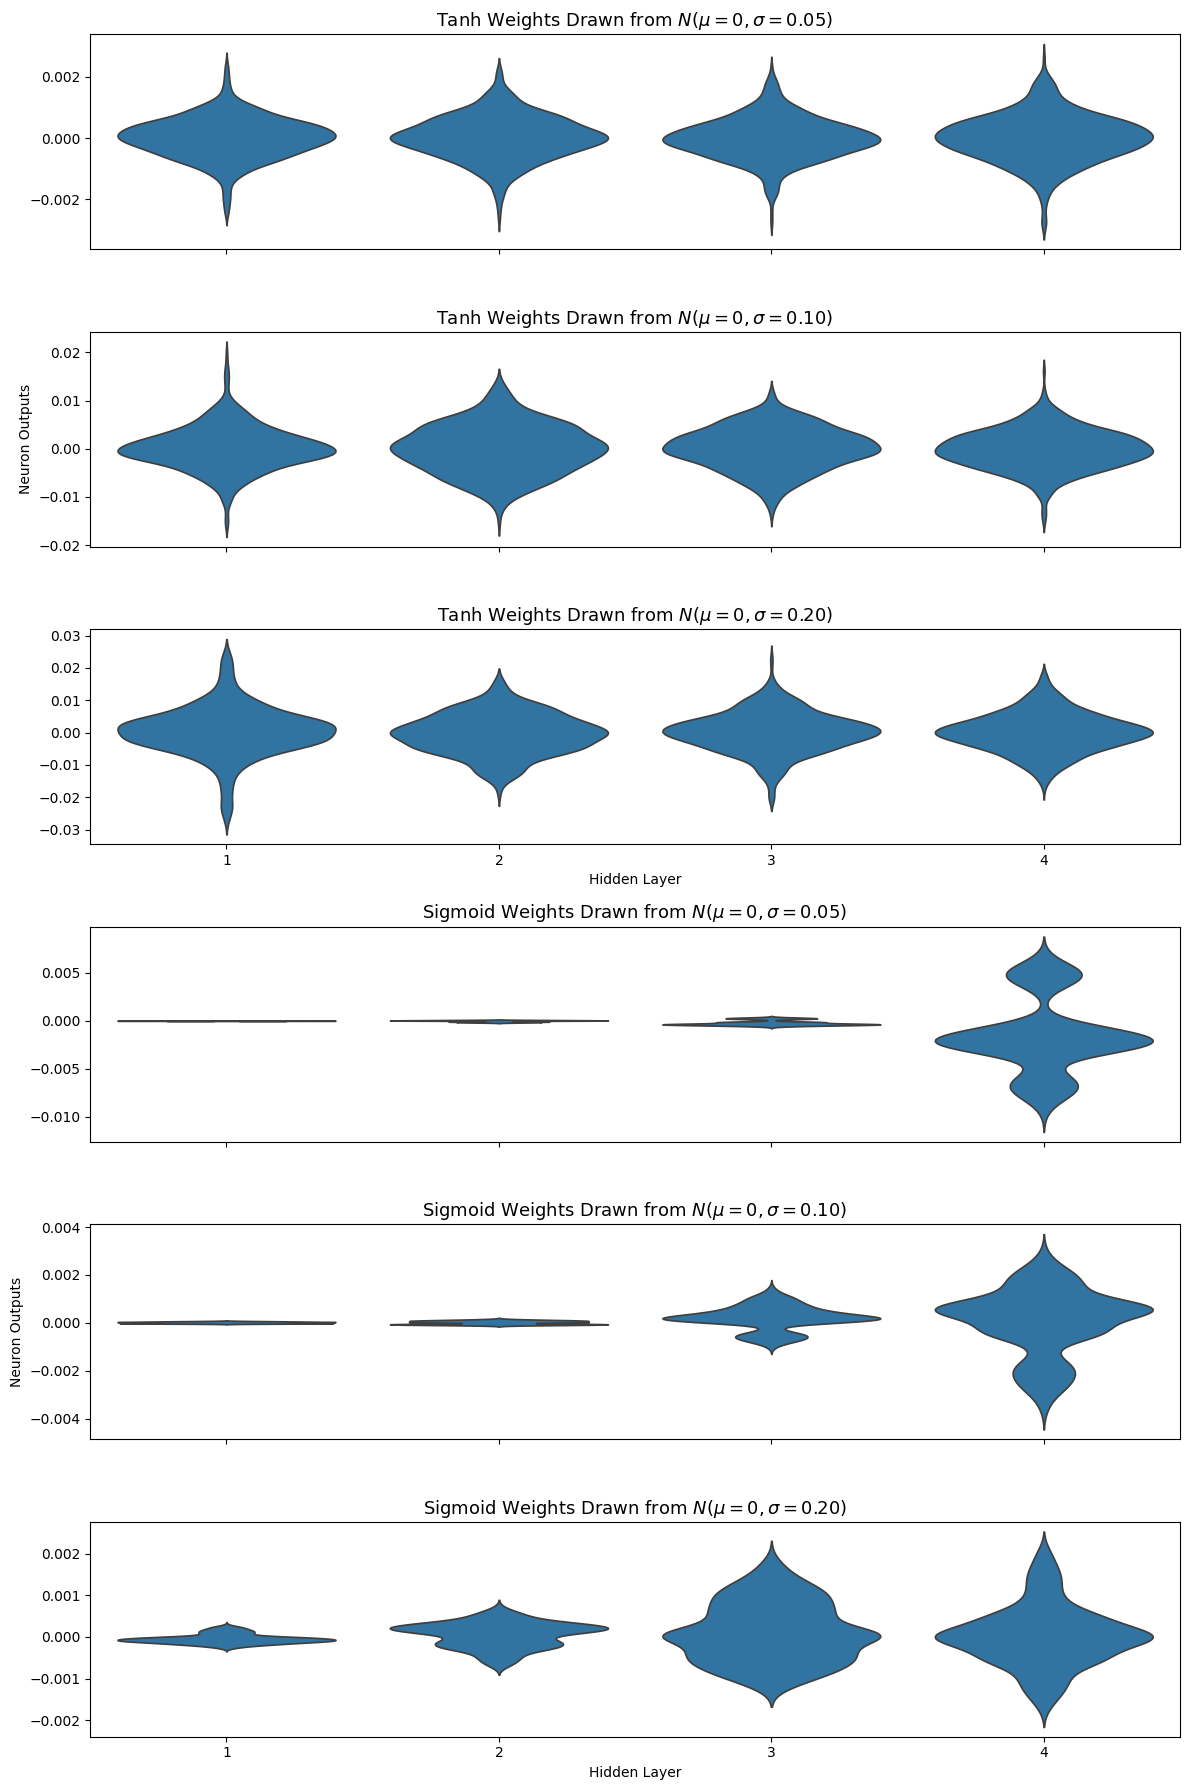

In [ ]:

seed = 10
n_train = 60000
n_test = 10000
n_classes = 10
n_hidden_layers = 5
dim_layer = 100
data_dim = 28 * 28

# Load and prepare MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()
num_classes = len(np.unique(y_test))

x_train = x_train.reshape(60000, 784).astype('float32')[:n_train] / 255
x_test = x_test.reshape(10000, 784).astype('float32')[:n_test] / 255

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

# List of activation functions to test
activations = [ 'tanh', 'sigmoid']
sigmas = [0.05, 0.1, 0.2]

# Function to create and compile the MLP model
def create_mlp_model(n_hidden_layers, dim_layer, input_shape, n_classes, init, bias_init, activation):
    from keras.models import Sequential
    from keras.layers import Dense

    model = Sequential()
    model.add(Dense(dim_layer, input_shape=input_shape, kernel_initializer=init, bias_initializer=bias_init, activation=activation))

    for _ in range(n_hidden_layers - 1):
        model.add(Dense(dim_layer, kernel_initializer=init, bias_initializer=bias_init, activation=activation))

    model.add(Dense(n_classes, activation='softmax'))
    return model

def compile_model(model):
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Collect the gradient data for each activation
rows = []
for activation in activations:
    for stddev in sigmas:
        init = initializers.RandomNormal(mean=0.0, stddev=stddev, seed=seed)

        model = create_mlp_model(n_hidden_layers, dim_layer, (data_dim,), n_classes, init, 'zeros', activation)
        compile_model(model)


        output_elts = get_gradients(model, x_test, y_test)
        n_layers = len(model.layers)
        i_output_layer = n_layers - 1

        for i, out in enumerate(output_elts[:-1]):
            if i > 0 and i != i_output_layer:
                for out_i in out.numpy().ravel()[::20]:
                    rows.append([activation, i, stddev, out_i])

df = pd.DataFrame(rows, columns=['Activation', 'Hidden Layer', 'Standard Deviation', 'Output'])

# Plotting
fig = plt.figure(figsize=(12, 18))
axes = grid_axes_it(len(activations) * len(sigmas), 1, fig=fig)
for activation in activations:
    for sig in sigmas:
        ax = next(axes)
        ddf = df[(df['Activation'] == activation) & (df['Standard Deviation'] == sig)]
        sns.violinplot(x='Hidden Layer', y='Output', data=ddf, ax=ax, scale='count', inner=None)

        ax.set_xlabel('')
        ax.set_ylabel('')
        ax.set_title(f'{activation.capitalize()} Weights Drawn from $N(\\mu = 0, \\sigma = {sig:.2f})$', fontsize=13)

        if sig == sigmas[1]:
            ax.set_ylabel("Neuron Outputs")
        if sig != sigmas[-1]:
            ax.set_xticklabels(())
        else:
            ax.set_xlabel("Hidden Layer")

plt.tight_layout()
plt.show()

The experiments demonstrate that the vanishing gradient problem significantly affects both tanh and sigmoid activation functions, especially with small standard deviations ($\sigma = 0.05$), where gradients in deeper layers are nearly zero, severely hindering learning. Increasing the standard deviation to $\sigma = 0.10$ and $\sigma = 0.20$ helps distribute gradients more evenly, reducing the issue but not fully eliminating it. The sigmoid function exhibits a more pronounced vanishing effect compared to tanh due to its quicker saturation.

### 2. Next, show how Xavier (aka Glorot normal) initialization of weights helps in dealing with this problem. For each of the activation functions in the previous part, you should plot the gradients at each of the 5 layers in the neural network. Compare the plots with the previous part, and briefly discuss your observations. (4)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
<ipython-input-14-456f2d8082f3>:30: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='count'` for the same effect.
  sns.violinplot(x='Hidden Layer', y='Output', data=ddf_xavier, ax=ax, scale='count', inner=None)
<ipython-input-14-456f2d8082f3>:30: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='count'` for the same effect.
  sns.violinplot(x='Hidden Layer', y='Output', data=ddf_xavier, ax=ax, scale='count', inner=None)


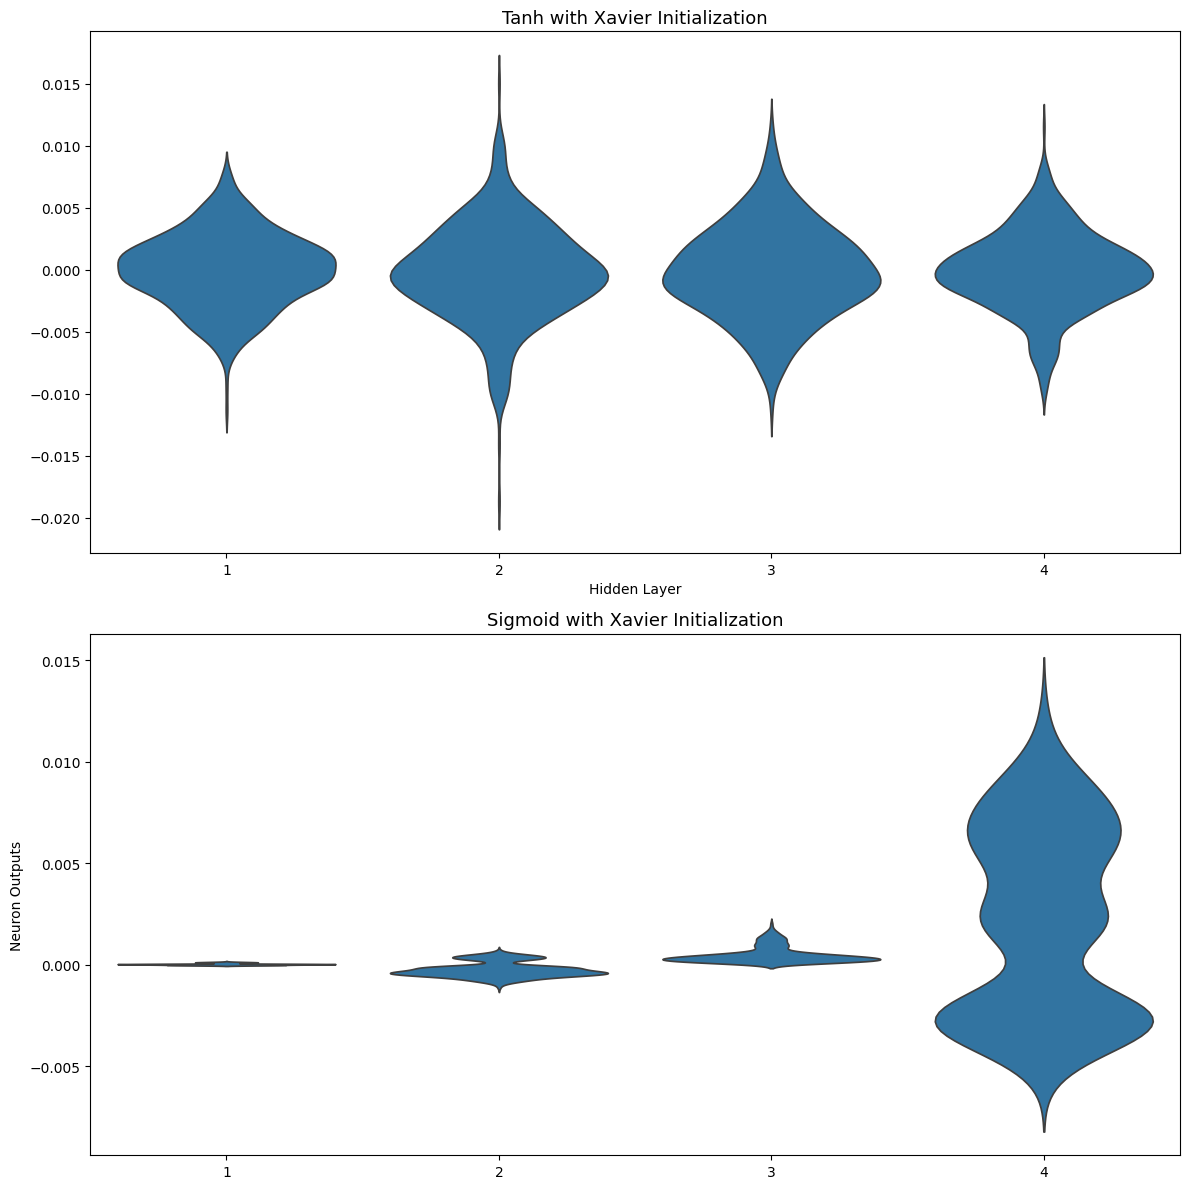

In [ ]:
from keras.initializers import GlorotNormal

# Collect gradient data using Xavier (Glorot normal) initialization
rows_xavier = []
xavier_init = GlorotNormal(seed=seed)

for activation in activations:
    model = create_mlp_model(n_hidden_layers, dim_layer, (data_dim,), n_classes, xavier_init, 'zeros', activation)
    compile_model(model)

    # Assume `get_gradients` is a function you have defined
    output_elts = get_gradients(model, x_test, y_test)
    n_layers = len(model.layers)
    i_output_layer = n_layers - 1

    for i, out in enumerate(output_elts[:-1]):
        if i > 0 and i != i_output_layer:
            for out_i in out.numpy().ravel()[::20]:
                rows_xavier.append([activation, i, out_i])

# Create a DataFrame for Xavier initialization
df_xavier = pd.DataFrame(rows_xavier, columns=['Activation', 'Hidden Layer', 'Output'])

# Plotting
fig = plt.figure(figsize=(12, 12))
axes = grid_axes_it(len(activations), 1, fig=fig)
for activation in activations:
    ax = next(axes)
    ddf_xavier = df_xavier[df_xavier['Activation'] == activation]
    sns.violinplot(x='Hidden Layer', y='Output', data=ddf_xavier, ax=ax, scale='count', inner=None)

    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.set_title(f'{activation.capitalize()} with Xavier Initialization', fontsize=13)
    if activation == activations[1]:
        ax.set_ylabel("Neuron Outputs")
    else:
        ax.set_xlabel("Hidden Layer")

plt.tight_layout()
plt.show()

With Xavier initialization, the gradients across all hidden layers are more uniformly distributed compared to the previous random normal initialization.     The distribution is broader and centered around zero, reducing the risk of vanishing gradients.   Xavier initialization also significantly improves the gradient distribution for the sigmoid activation function.    The gradients are now more pronounced in the deeper layers compared to the previous case, where they were almost zero.  The tanh function benefits significantly, with gradients being well-distributed across layers.    The sigmoid function, while still showing some diminishing effect, also exhibits better gradient flow, allowing for more effective training compared to random normal initialization.

### 3.The dying ReLU is a kind of vanishing gradient, which refers to the problem when ReLU neurons become inactive and only output 0 for any input. In the worst case of dying ReLU, ReLU neurons at a certain layer are all dead, i.e., the entire network dies and is referred to as the dying ReLU neural network in Lu et al (reference below). A dying ReLU neural network collapses to a constant function.Show this phenomenon using any one of the three 1-dimensional functions on page 13 of Lu et al. Use a ReLU network with 10 hidden layers, each of width 2 (hidden units per layer). Use a minibatch size of64 and draw training data uniformly from [− 7, 7]. Perform 1000 independent training simulations each with 3,000 training points. Out of these 1000 simulations, what fraction resulted in neural network collapse? Is your answer close to over 90% as was reported in Lu et al.?

In [ ]:
import numpy as np

def relu(x):
    """ReLU activation function."""
    return np.maximum(0, x)

def initialize_weights_he(input_size, layer_sizes):
    """Initialize weights using He initialization."""
    weights = []
    biases = []
    for size in layer_sizes:
        weights.append(np.random.randn(input_size, size) * np.sqrt(2 / input_size))
        biases.append(np.zeros((1, size)))
        input_size = size
    return weights, biases

def forward_propagate(x, weights, biases):
    """Perform forward propagation through the network."""
    activations = [x]
    for w, b in zip(weights, biases):
        z = np.dot(activations[-1], w) + b
        a = relu(z)
        activations.append(a)
    return activations

def check_dead_neurons(activations):
    return np.all(activations[-1] == 0)

def run_simulation(num_simulations, num_layers=10, layer_size=2, input_range=7, num_points=3000, batch_size=64, random_seed=42):
    np.random.seed(random_seed)
    dead_neuron_count = 0

    for simulation in range(1, num_simulations + 1):
        # Generate input data uniformly from [-sqrt(7), sqrt(7)]
        x = np.random.uniform(-np.sqrt(input_range), np.sqrt(input_range), (num_points, 1))
        y = np.abs(x)  # Target function f1(x) = |x|

        # Initialize weights and biases with He initialization
        weights, biases = initialize_weights_he(1, [layer_size] * num_layers)

        for start in range(0, num_points, batch_size):
            end = start + batch_size
            x_batch = x[start:end]

            # Perform forward propagation on the minibatch
            activations = forward_propagate(x_batch, weights, biases)


        if check_dead_neurons(activations):
            dead_neuron_count += 1


        current_collapse_rate = dead_neuron_count / simulation


    collapse_ratio = dead_neuron_count / num_simulations
    print(f"Final collapse rate: {collapse_ratio:.2%}")
    return collapse_ratio


num_simulations = 1000
collapse_ratio = run_simulation(num_simulations)

Final collapse rate: 91.30%


0.913

My result is 91.3% which is close to over 90% as was reported in Lu et al..This phenomenon indicates that when deep ReLU networks are trained, a large number of neurons may lose their activity if they are improperly initialized or optimized, resulting in the network being unable to fit data or learn complex patterns.

### 4. Instead of ReLU consider Leaky ReLU activation as defined below:

In [ ]:
import numpy as np

def leaky_relu(x):
    """Leaky ReLU activation function."""
    return np.where(x > 0, x, 0.01 * x)

def initialize_weights_he(input_size, layer_sizes):
    """Initialize weights using He initialization."""
    weights = []
    biases = []
    for size in layer_sizes:
        # He initialization: weights drawn from N(0, sqrt(2 / input_size))
        weights.append(np.random.randn(input_size, size) * np.sqrt(2 / input_size))
        biases.append(np.zeros((1, size)))
        input_size = size
    return weights, biases

def forward_propagate_leaky_relu(x, weights, biases):
    """Perform forward propagation using Leaky ReLU through the network."""
    activations = [x]
    for w, b in zip(weights, biases):
        z = np.dot(activations[-1], w) + b
        a = leaky_relu(z)
        activations.append(a)
    return activations

def check_dead_neurons(activations):
    """Check if all neurons in the final layer are dead (i.e., output zero)."""
    return np.all(activations[-1] == 0)

def run_simulation_leaky_relu(num_simulations, num_layers=10, layer_size=2, input_range=7, num_points=3000, batch_size=64, random_seed=42):
    # Set the random seed for reproducibility
    np.random.seed(random_seed)
    dead_neuron_count = 0

    for simulation in range(1, num_simulations + 1):
        # Generate input data uniformly from [-sqrt(7), sqrt(7)]
        x = np.random.uniform(-np.sqrt(input_range), np.sqrt(input_range), (num_points, 1))
        y = np.abs(x)  # Target function f1(x) = |x|

        # Initialize weights and biases with He initialization
        weights, biases = initialize_weights_he(1, [layer_size] * num_layers)

        # Simulate minibatch processing
        for start in range(0, num_points, batch_size):
            end = start + batch_size
            x_batch = x[start:end]

            # Perform forward propagation on the minibatch using Leaky ReLU
            activations = forward_propagate_leaky_relu(x_batch, weights, biases)

        # Check if all neurons in the final layer are dead
        if check_dead_neurons(activations):
            dead_neuron_count += 1

    # Calculate the final collapse ratio
    collapse_ratio = dead_neuron_count / num_simulations
    print(f"Final collapse rate using Leaky ReLU: {collapse_ratio:.2%}")
    return collapse_ratio

# Run the simulation with 1000 independent trials using Leaky ReLU
num_simulations = 1000
collapse_ratio_leaky_relu = run_simulation_leaky_relu(num_simulations)


Final collapse rate using Leaky ReLU: 0.00%


0.0

Yes, since my collapse rate is 0% now. Leaky ReLU prevents the dying neuron problem because it ensures that every neuron can still update its weights, even when the inputs are negative. By maintaining a non-zero gradient for negative inputs, the network can continue learning, which makes it much less likely for neurons to become inactive and for the network to collapse.

# Problem 4

### 1. Read two papers referenced below and explain the terms co-adaptation and internal covariate shift. Use examples if needed. (2)
* Co-adaptation:  In neural networks, co-adaptation occurs when neurons adapt to work together, relying on specific patterns rather than learning independent features. Dropout mitigates co-adaptation by randomly deactivating neurons during training, forcing the network to learn more robust, independent features.
  
* Internal Covariate Shift: The change in layer input distributions during training as parameters in previous layers update which slows down the training by requiring lower learning rates and careful parameter initialization, and makes it notoriously hard to train models with saturating nonlinearities. Batch Normalization addresses this by normalizing inputs for each layer, stabilizing distributions and accelerating training.


### 2. Batch normalization is traditionally used in hidden layers, for the input layer, standard normalization is used. In standard normalization, the mean and standard deviation are calculated using the entire training dataset whereas in batch normalization these statistics are calculated for each mini-batch.Train LeNet-5 for 10 epochs with standard normalization of input and batch normalization for hidden layers. You may use SGD as the optimizer, and a batch size of 128. What are the learned batch nor- malization parameters for each layer? Plot the distribution of learned batch normalization parameters for each layer using violin plots. You should have one figure for each batch normalization parameter, and within each figure, you will have a violin plot for the distribution of that parameter on each layer. (5)

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:

class LeNet5(nn.Module):
    def __init__(self):
        super(LeNet5, self).__init__()
        self.conv1 = nn.Conv2d(1, 6, kernel_size=5, stride=1, padding=2)
        self.bn1 = nn.BatchNorm2d(6)
        self.conv2 = nn.Conv2d(6, 16, kernel_size=5, stride=1)
        self.bn2 = nn.BatchNorm2d(16)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.bn3 = nn.BatchNorm1d(120)
        self.fc2 = nn.Linear(120, 84)
        self.bn4 = nn.BatchNorm1d(84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = torch.relu(self.bn1(self.conv1(x)))
        x = torch.max_pool2d(x, 2, 2)
        x = torch.relu(self.bn2(self.conv2(x)))
        x = torch.max_pool2d(x, 2, 2)
        x = x.view(-1, 16 * 5 * 5)
        x = torch.relu(self.bn3(self.fc1(x)))
        x = torch.relu(self.bn4(self.fc2(x)))
        x = self.fc3(x)
        return x

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 9.91M/9.91M [00:11<00:00, 898kB/s] 


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 28.9k/28.9k [00:00<00:00, 66.0kB/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 1.65M/1.65M [00:01<00:00, 1.28MB/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 4.54k/4.54k [00:00<00:00, 5.51MB/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



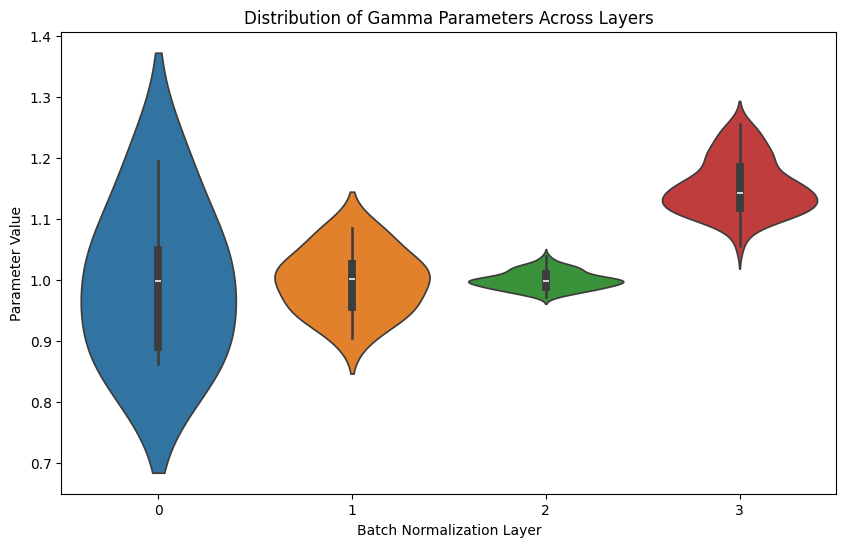

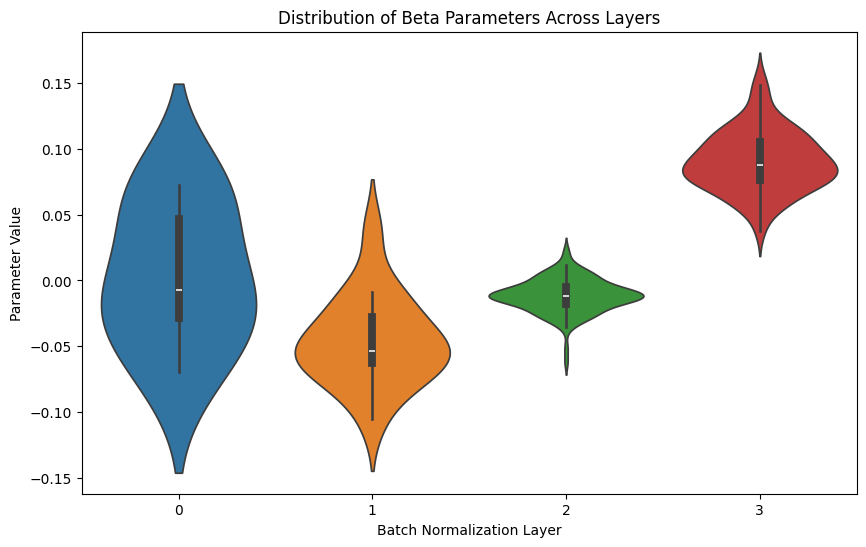

In [ ]:


# Data transformation with standard normalization
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))  # Standard normalization
])

# Load the MNIST dataset
trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=128, shuffle=True)

# Initialize the network and optimizer
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
net = LeNet5().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.01, momentum=0.9)

# Train the network
for epoch in range(10):
    running_loss = 0.0
    for inputs, labels in trainloader:
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

# Extract learned batch normalization parameters
bn_layers = [net.bn1, net.bn2, net.bn3, net.bn4]
gammas = [layer.weight.detach().cpu().numpy() for layer in bn_layers]
betas = [layer.bias.detach().cpu().numpy() for layer in bn_layers]

# Plotting the distributions using violin plots
def plot_violin(data, title):
    plt.figure(figsize=(10, 6))
    sns.violinplot(data=data)
    plt.title(title)
    plt.xlabel("Batch Normalization Layer")
    plt.ylabel("Parameter Value")
    plt.show()

plot_violin(gammas, "Distribution of Gamma Parameters Across Layers")
plot_violin(betas, "Distribution of Beta Parameters Across Layers")

1. Gamma parameter distribution: used to adjust the "scale" of the normalized data. As you can see from the violin plot, each hidden layer has a different distribution of gamma parameters, but they are generally clustered around values close to 1. This shows that batch normalization retains some flexibility in adjusting the activation amplitude of each layer, but still maintains a relatively stable value.
2. Beta parameter distribution: used to adjust the "translation position" of the standardized data. The distribution of beta parameters is also concentrated in a small range, indicating that the adjustment of offset by batch normalization is limited, and the adjustment is mainly in the range of slight changes.

### 3.Next, instead of standard normalization, use batch normalization for the input layer as well. Train the network again with the same hyperparameters. Plot the distribution of learned batch norm parameters for each layer (including input) using violin plots similar to the previous part. However, now for each figure you should have one more violin plot compared with the previous part, which corresponds to the distribution of the batch normalization parameters on the input layer.


In [ ]:
# Define LeNet-5 with Batch Normalization on the input layer
class LeNet5WithInputBN(nn.Module):
    def __init__(self):
        super(LeNet5WithInputBN, self).__init__()
        self.bn_input = nn.BatchNorm2d(1)  # Batch normalization for the input layer
        self.conv1 = nn.Conv2d(1, 6, kernel_size=5, stride=1, padding=2)
        self.bn1 = nn.BatchNorm2d(6)
        self.conv2 = nn.Conv2d(6, 16, kernel_size=5, stride=1)
        self.bn2 = nn.BatchNorm2d(16)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.bn3 = nn.BatchNorm1d(120)
        self.fc2 = nn.Linear(120, 84)
        self.bn4 = nn.BatchNorm1d(84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.bn_input(x)  # Apply batch normalization to the input
        x = torch.relu(self.bn1(self.conv1(x)))
        x = torch.max_pool2d(x, 2, 2)
        x = torch.relu(self.bn2(self.conv2(x)))
        x = torch.max_pool2d(x, 2, 2)
        x = x.view(-1, 16 * 5 * 5)
        x = torch.relu(self.bn3(self.fc1(x)))
        x = torch.relu(self.bn4(self.fc2(x)))
        x = self.fc3(x)
        return x


In [ ]:
# Data transformation (no standard normalization)
transform = transforms.Compose([
    transforms.ToTensor()
])

# Load the MNIST dataset
trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=128, shuffle=True)

# Initialize the network and optimizer
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
net = LeNet5WithInputBN().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.01, momentum=0.9)

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 9.91M/9.91M [00:01<00:00, 5.11MB/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 28.9k/28.9k [00:00<00:00, 57.9kB/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 1.65M/1.65M [00:01<00:00, 1.27MB/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 4.54k/4.54k [00:00<00:00, 5.28MB/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [ ]:
# Train the network
for epoch in range(10):
    running_loss = 0.0
    for inputs, labels in trainloader:
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

# Extract learned batch normalization parameters
bn_layers = [net.bn_input, net.bn1, net.bn2, net.bn3, net.bn4]
gammas = [layer.weight.detach().cpu().numpy() for layer in bn_layers]
betas = [layer.bias.detach().cpu().numpy() for layer in bn_layers]


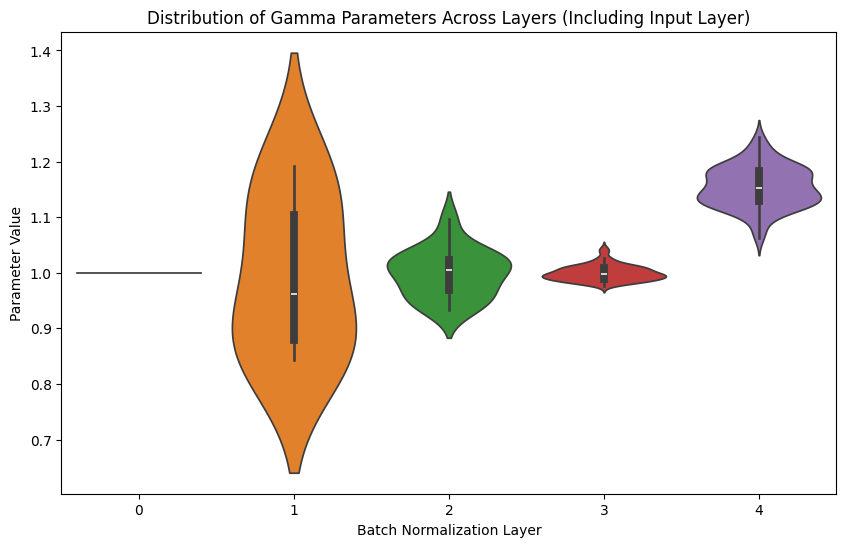

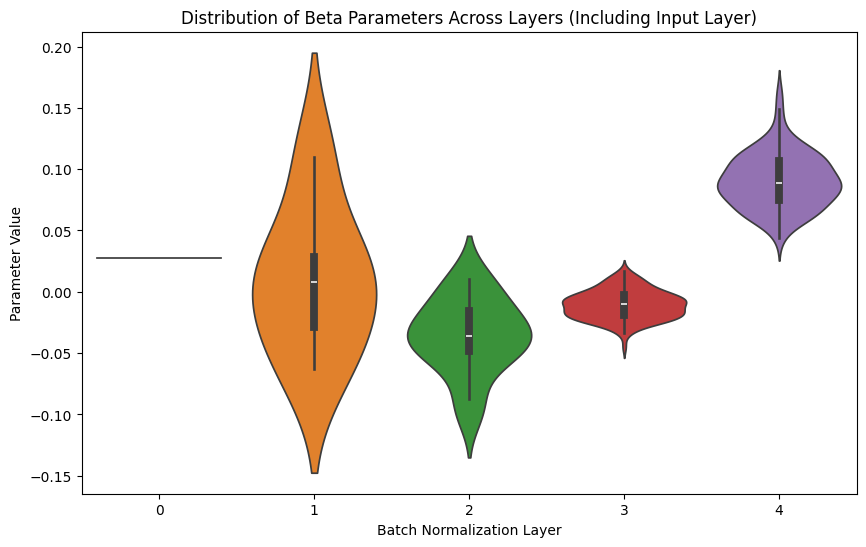

In [ ]:
# Plotting the distributions using violin plots
def plot_violin(data, title):
    plt.figure(figsize=(10, 6))
    sns.violinplot(data=data)
    plt.title(title)
    plt.xlabel("Batch Normalization Layer")
    plt.ylabel("Parameter Value")
    plt.show()

plot_violin(gammas, "Distribution of Gamma Parameters Across Layers (Including Input Layer)")
plot_violin(betas, "Distribution of Beta Parameters Across Layers (Including Input Layer)")

Besides, compare the train/test accuracy and loss for the two cases, by plotting them over epochs. You should have one plot for accuracy, which includes two subplots: standard normalization for the input layer (the experiment in part 2) and batch normalization for the input layer (the experiment in part 3). For each subplot, you should have two line plots for training and testing accuracy as a function of epochs. For the sake of comparison, please make sure both subplots share the exact same scale on the y-axis. In a similar manner, you should have another plot (which includes two subplots) for training and testing loss. Briefly summarize your observations. Did batch normalization for the input layer improve performance? (5)

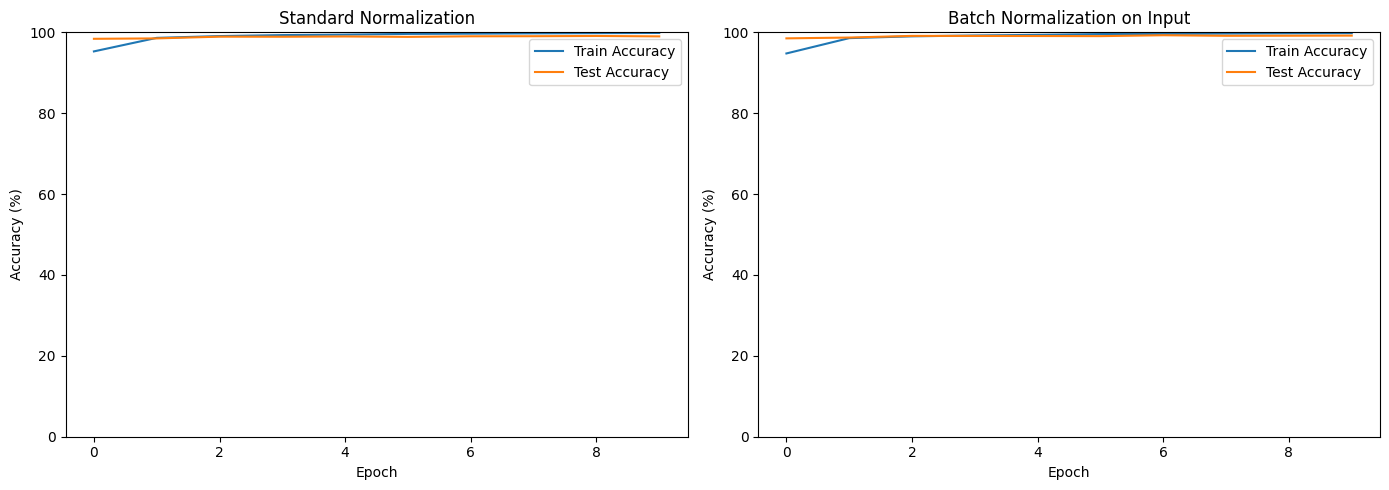

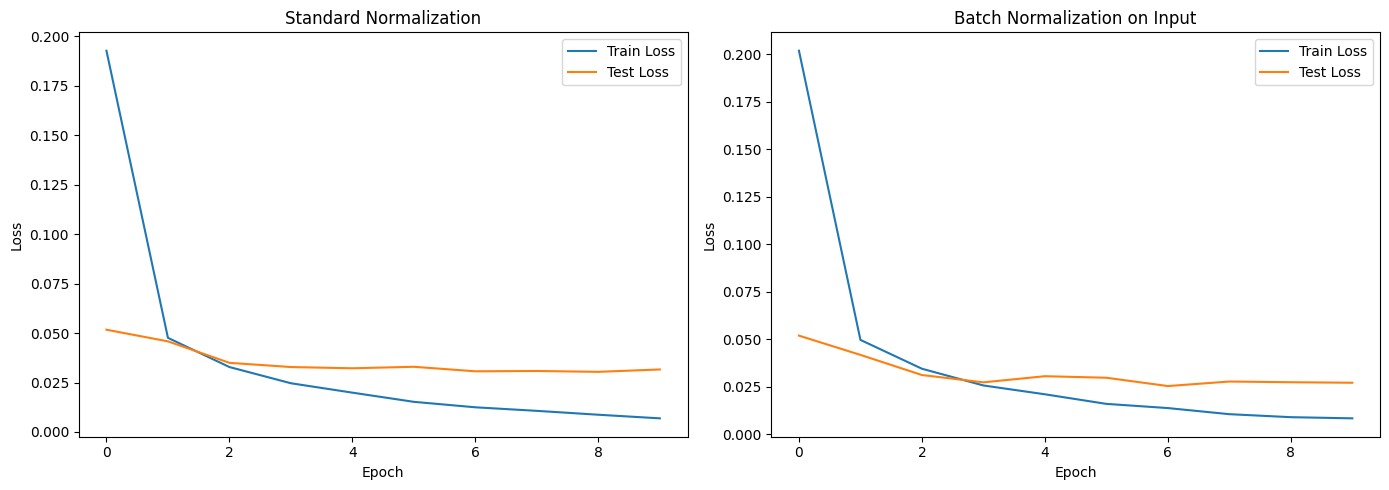

In [ ]:
# Corrected function call and plotting
def train_and_evaluate(net, trainloader, testloader, criterion, optimizer, num_epochs):
    train_acc, test_acc = [], []
    train_loss, test_loss = [], []

    for epoch in range(num_epochs):
        # Training phase
        net.train()
        correct, total, running_loss = 0, 0, 0.0
        for inputs, labels in trainloader:
            inputs, labels = inputs.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = net(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            # Statistics
            running_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

        train_loss.append(running_loss / len(trainloader))
        train_acc.append(100 * correct / total)

        # Testing phase
        net.eval()
        correct, total, running_loss = 0, 0, 0.0
        with torch.no_grad():
            for inputs, labels in testloader:
                inputs, labels = inputs.to(device), labels.to(device)
                outputs = net(inputs)
                loss = criterion(outputs, labels)
                running_loss += loss.item()
                _, predicted = torch.max(outputs, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()

        test_loss.append(running_loss / len(testloader))
        test_acc.append(100 * correct / total)

    return train_acc, test_acc, train_loss, test_loss

# Load the MNIST dataset with transformations
transform_standard = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))  # Standard normalization
])
transform_batchnorm = transforms.Compose([
    transforms.ToTensor()  # No standard normalization
])

trainset_standard = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform_standard)
testset_standard = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform_standard)
trainloader_standard = torch.utils.data.DataLoader(trainset_standard, batch_size=128, shuffle=True)
testloader_standard = torch.utils.data.DataLoader(testset_standard, batch_size=128, shuffle=False)

trainset_batchnorm = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform_batchnorm)
testset_batchnorm = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform_batchnorm)
trainloader_batchnorm = torch.utils.data.DataLoader(trainset_batchnorm, batch_size=128, shuffle=True)
testloader_batchnorm = torch.utils.data.DataLoader(testset_batchnorm, batch_size=128, shuffle=False)

# Initialize the networks
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
net_standard = LeNet5().to(device)  # Using standard normalization for input
net_batchnorm = LeNet5WithInputBN().to(device)  # Using batch normalization for input

# Set up loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer_standard = optim.SGD(net_standard.parameters(), lr=0.01, momentum=0.9)
optimizer_batchnorm = optim.SGD(net_batchnorm.parameters(), lr=0.01, momentum=0.9)

# Train and evaluate both models
train_acc_standard, test_acc_standard, train_loss_standard, test_loss_standard = train_and_evaluate(
    net_standard, trainloader_standard, testloader_standard, criterion, optimizer_standard, 10
)
train_acc_batchnorm, test_acc_batchnorm, train_loss_batchnorm, test_loss_batchnorm = train_and_evaluate(
    net_batchnorm, trainloader_batchnorm, testloader_batchnorm, criterion, optimizer_batchnorm, 10
)

# Plotting accuracy
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
axes[0].plot(range(10), train_acc_standard, label='Train Accuracy')
axes[0].plot(range(10), test_acc_standard, label='Test Accuracy')
axes[0].set_title("Standard Normalization")
axes[0].set_xlabel("Epoch")
axes[0].set_ylabel("Accuracy (%)")
axes[0].set_ylim(0, 100)
axes[0].legend()

axes[1].plot(range(10), train_acc_batchnorm, label='Train Accuracy')
axes[1].plot(range(10), test_acc_batchnorm, label='Test Accuracy')
axes[1].set_title("Batch Normalization on Input")
axes[1].set_xlabel("Epoch")
axes[1].set_ylabel("Accuracy (%)")
axes[1].set_ylim(0, 100)
axes[1].legend()

plt.tight_layout()
plt.show()

# Plotting loss
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
axes[0].plot(range(10), train_loss_standard, label='Train Loss')
axes[0].plot(range(10), test_loss_standard, label='Test Loss')
axes[0].set_title("Standard Normalization")
axes[0].set_xlabel("Epoch")
axes[0].set_ylabel("Loss")
axes[0].legend()

axes[1].plot(range(10), train_loss_batchnorm, label='Train Loss')
axes[1].plot(range(10), test_loss_batchnorm, label='Test Loss')
axes[1].set_title("Batch Normalization on Input")
axes[1].set_xlabel("Epoch")
axes[1].set_ylabel("Loss")
axes[1].legend()

plt.tight_layout()
plt.show()

Batch normalization for the input layer may improve training and testing accuracy faster compared to standard normalization. Although it’s somewhat difficult to see, it is clear that batch normalization allows the model to approach 100% accuracy earlier.

The loss for batch normalization could decrease more steadily, indicating more stable training dynamics. Although it is not very pronounced, the turning point for batch normalization appears to be at a lower loss value, suggesting improved training stability.

Thus batch normalization on the input layer might provide better generalization, reducing overfitting and achieving higher test accuracy.

### 4. Using the same hyperparameters, train the network without batch normalization but this time use dropout. For hidden layers, use a dropout probability of 0.5 and for the input layer, take it to be 0.2. Compare train/test accuracy using dropout to the previous two experiments using batch normalization in parts 2 and 3 by adding a subplot in the previous accuracy plot. Again, please make sure all three subplots share the same scale on the y-axis. Briefly summarize your observations. Did dropout help improve performance?

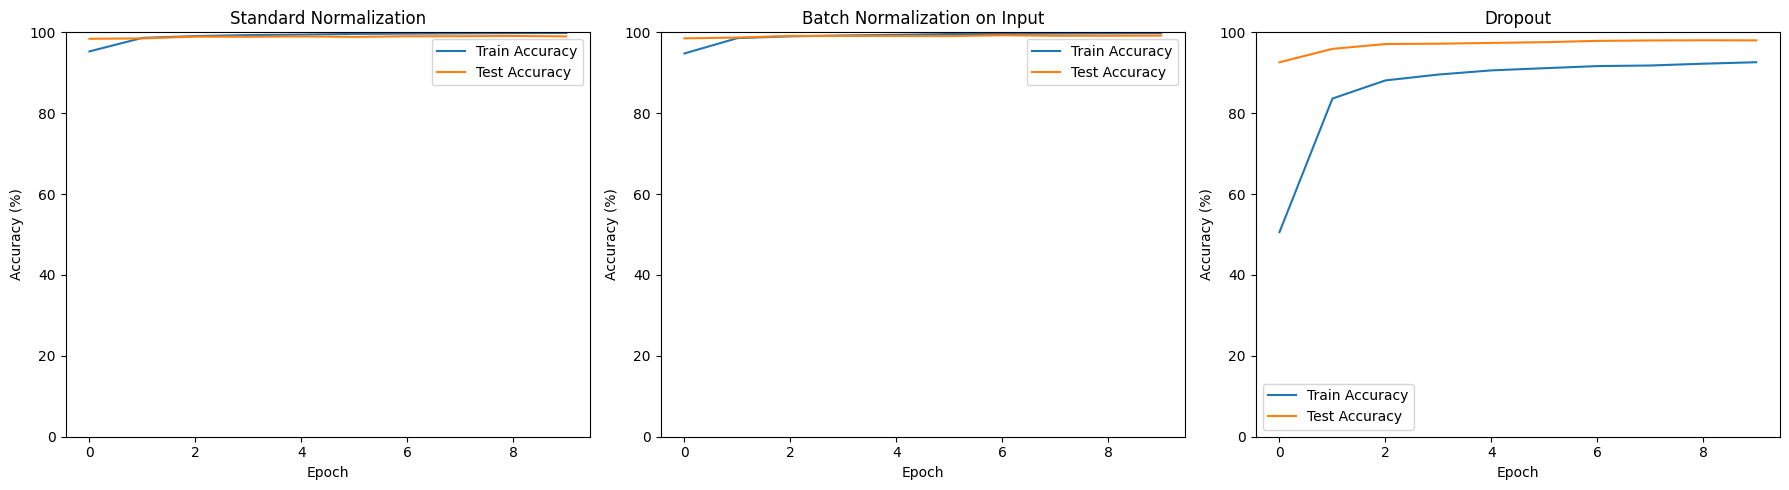

In [ ]:


class LeNet5WithDropout(nn.Module):
    def __init__(self):
        super(LeNet5WithDropout, self).__init__()
        self.dropout_input = nn.Dropout(0.2)  # Dropout for the input layer with probability 0.2
        self.conv1 = nn.Conv2d(1, 6, kernel_size=5, stride=1, padding=2)
        self.dropout1 = nn.Dropout(0.5)  # Dropout for the first hidden layer with probability 0.5
        self.conv2 = nn.Conv2d(6, 16, kernel_size=5, stride=1)
        self.dropout2 = nn.Dropout(0.5)  # Dropout for the second hidden layer with probability 0.5
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.dropout3 = nn.Dropout(0.5)  # Dropout for the first fully connected layer with probability 0.5
        self.fc2 = nn.Linear(120, 84)
        self.dropout4 = nn.Dropout(0.5)  # Dropout for the second fully connected layer with probability 0.5
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.dropout_input(x)
        x = torch.relu(self.conv1(x))
        x = torch.max_pool2d(x, 2, 2)
        x = self.dropout1(x)
        x = torch.relu(self.conv2(x))
        x = torch.max_pool2d(x, 2, 2)
        x = self.dropout2(x)
        x = x.view(-1, 16 * 5 * 5)
        x = torch.relu(self.fc1(x))
        x = self.dropout3(x)
        x = torch.relu(self.fc2(x))
        x = self.dropout4(x)
        x = self.fc3(x)
        return x

# Initialize the network
net_dropout = LeNet5WithDropout().to(device)

# Set up loss and optimizer
optimizer_dropout = optim.SGD(net_dropout.parameters(), lr=0.01, momentum=0.9)

# Train and evaluate the model with dropout
train_acc_dropout, test_acc_dropout, train_loss_dropout, test_loss_dropout = train_and_evaluate(
    net_dropout, trainloader_standard, testloader_standard, criterion, optimizer_dropout, 10
)

# Plotting accuracy with an additional subplot for dropout
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
axes[0].plot(range(10), train_acc_standard, label='Train Accuracy')
axes[0].plot(range(10), test_acc_standard, label='Test Accuracy')
axes[0].set_title("Standard Normalization")
axes[0].set_xlabel("Epoch")
axes[0].set_ylabel("Accuracy (%)")
axes[0].set_ylim(0, 100)
axes[0].legend()

axes[1].plot(range(10), train_acc_batchnorm, label='Train Accuracy')
axes[1].plot(range(10), test_acc_batchnorm, label='Test Accuracy')
axes[1].set_title("Batch Normalization on Input")
axes[1].set_xlabel("Epoch")
axes[1].set_ylabel("Accuracy (%)")
axes[1].set_ylim(0, 100)
axes[1].legend()

axes[2].plot(range(10), train_acc_dropout, label='Train Accuracy')
axes[2].plot(range(10), test_acc_dropout, label='Test Accuracy')
axes[2].set_title("Dropout")
axes[2].set_xlabel("Epoch")
axes[2].set_ylabel("Accuracy (%)")
axes[2].set_ylim(0, 100)
axes[2].legend()

plt.tight_layout()
plt.show()


Dropout helped improve performance by reducing overfitting, as seen in the right plot where the training accuracy is significantly lower compared to the test accuracy, especially in the initial epochs. This indicates that dropout effectively regularized the model, making it more robust and preventing it from memorizing the training data. As training progressed, the gap between training and test accuracy decreased, but the model maintained better generalization compared to using only standard or batch normalization, albeit at the cost of slower convergence and lower overall training accuracy.Dropout introduces noise during training, which may slow down convergence compared to batch normalization.


### 5. Now, still using the same set of hyperparameters, train the network using both batch normaliza- tion(including input layer) and dropout. How does the performance of the network compare with the cases with dropout alone (in part 4) and with batch normalization alone (in part 3)? You should have one accuracy plot similar to previous parts, but this time contains three subplots, each corresponding to experiments in parts 3, 4, and 5. Briefly summarize your observations.

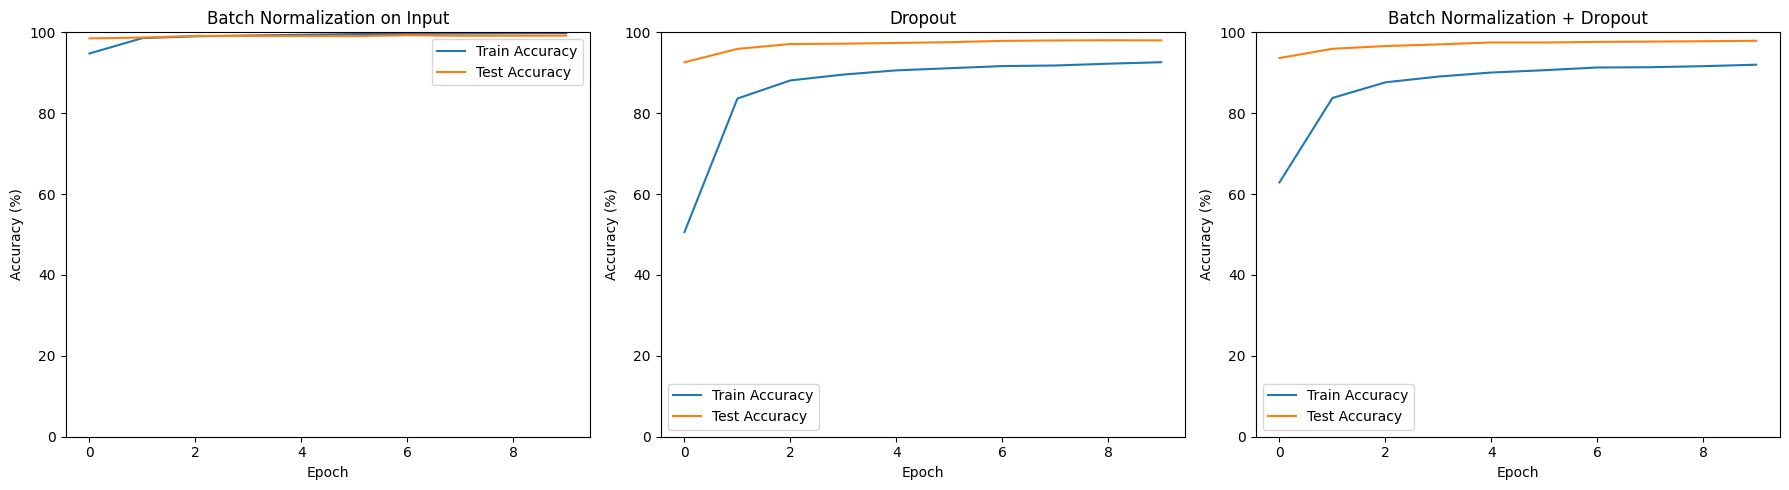

In [ ]:
# Define LeNet-5 with Both Batch Normalization and Dropout
class LeNet5WithBNAndDropout(nn.Module):
    def __init__(self):
        super(LeNet5WithBNAndDropout, self).__init__()
        self.bn_input = nn.BatchNorm2d(1)  # Batch normalization for the input layer
        self.dropout_input = nn.Dropout(0.2)  # Dropout for the input layer with probability 0.2
        self.conv1 = nn.Conv2d(1, 6, kernel_size=5, stride=1, padding=2)
        self.bn1 = nn.BatchNorm2d(6)
        self.dropout1 = nn.Dropout(0.5)  # Dropout for the first hidden layer with probability 0.5
        self.conv2 = nn.Conv2d(6, 16, kernel_size=5, stride=1)
        self.bn2 = nn.BatchNorm2d(16)
        self.dropout2 = nn.Dropout(0.5)  # Dropout for the second hidden layer with probability 0.5
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.bn3 = nn.BatchNorm1d(120)
        self.dropout3 = nn.Dropout(0.5)  # Dropout for the first fully connected layer with probability 0.5
        self.fc2 = nn.Linear(120, 84)
        self.bn4 = nn.BatchNorm1d(84)
        self.dropout4 = nn.Dropout(0.5)  # Dropout for the second fully connected layer with probability 0.5
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.bn_input(self.dropout_input(x))  # Apply batch normalization and dropout to the input
        x = torch.relu(self.bn1(self.conv1(x)))
        x = torch.max_pool2d(x, 2, 2)
        x = self.dropout1(x)
        x = torch.relu(self.bn2(self.conv2(x)))
        x = torch.max_pool2d(x, 2, 2)
        x = self.dropout2(x)
        x = x.view(-1, 16 * 5 * 5)
        x = torch.relu(self.bn3(self.fc1(x)))
        x = self.dropout3(x)
        x = torch.relu(self.bn4(self.fc2(x)))
        x = self.dropout4(x)
        x = self.fc3(x)
        return x

# Initialize the network
net_bn_dropout = LeNet5WithBNAndDropout().to(device)

# Set up loss and optimizer
optimizer_bn_dropout = optim.SGD(net_bn_dropout.parameters(), lr=0.01, momentum=0.9)

# Train and evaluate the model with both batch normalization and dropout
train_acc_bn_dropout, test_acc_bn_dropout, train_loss_bn_dropout, test_loss_bn_dropout = train_and_evaluate(
    net_bn_dropout, trainloader_standard, testloader_standard, criterion, optimizer_bn_dropout, 10
)

# Plotting accuracy with three subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
axes[0].plot(range(10), train_acc_batchnorm, label='Train Accuracy')
axes[0].plot(range(10), test_acc_batchnorm, label='Test Accuracy')
axes[0].set_title("Batch Normalization on Input")
axes[0].set_xlabel("Epoch")
axes[0].set_ylabel("Accuracy (%)")
axes[0].set_ylim(0, 100)
axes[0].legend()

axes[1].plot(range(10), train_acc_dropout, label='Train Accuracy')
axes[1].plot(range(10), test_acc_dropout, label='Test Accuracy')
axes[1].set_title("Dropout")
axes[1].set_xlabel("Epoch")
axes[1].set_ylabel("Accuracy (%)")
axes[1].set_ylim(0, 100)
axes[1].legend()

axes[2].plot(range(10), train_acc_bn_dropout, label='Train Accuracy')
axes[2].plot(range(10), test_acc_bn_dropout, label='Test Accuracy')
axes[2].set_title("Batch Normalization + Dropout")
axes[2].set_xlabel("Epoch")
axes[2].set_ylabel("Accuracy (%)")
axes[2].set_ylim(0, 100)
axes[2].legend()

plt.tight_layout()
plt.show()


 Batch Normalization on Input (left) achieves rapid convergence with both training and test accuracy reaching near 100% quickly and showing minimal overfitting. Dropout (middle) starts with much lower training accuracy, improving gradually, but maintains high test accuracy, highlighting its strong regularization effect and the prevention of overfitting, though with a noticeable gap between training and test accuracy. Batch Normalization + Dropout (right) combines the benefits of both methods, leading to more stable and gradual improvements in accuracy, with a smaller gap between training and test accuracy compared to using dropout alone, indicating balanced regularization and stability.

# problem 5


### 1. Fix batch size to 64 and start with 11 candidate learning rates: 10−9, 10−8, . . . , 101. Train your model for 5 epochs for each learning rate. Plot the training loss as a function of the learning rate. You should see a curve like Figure 2 in the referenced post below. Based on your plot, identify the values of lrmin and lrmax. (4)

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


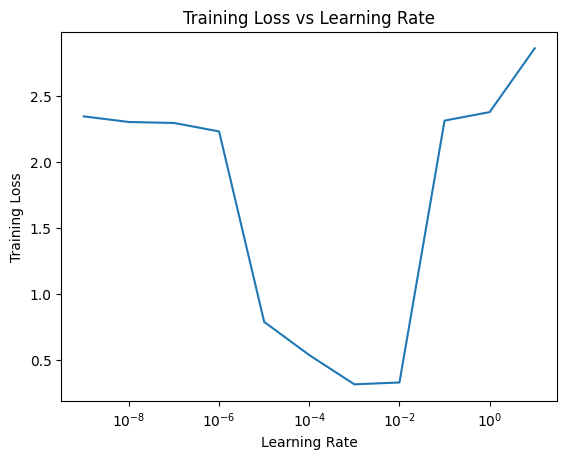

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from matplotlib import pyplot as plt

# Load the FashionMNIST dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()
x_train = x_train / 255.0
x_test = x_test / 255.0

# Expand dimensions to match the LeNet-5 input
x_train = np.expand_dims(x_train, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)

# Define the LeNet-5 model
def create_lenet5():
    model = keras.Sequential([
        layers.Conv2D(6, kernel_size=5, activation='relu', input_shape=(28, 28, 1)),
        layers.AveragePooling2D(pool_size=(2, 2)),
        layers.Conv2D(16, kernel_size=5, activation='relu'),
        layers.AveragePooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dense(120, activation='relu'),
        layers.Dense(84, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])
    return model

# Implement cyclical learning rate
class CyclicalLearningRate(keras.callbacks.Callback):
    def __init__(self, base_lr, max_lr, step_size):
        self.base_lr = base_lr
        self.max_lr = max_lr
        self.step_size = step_size
        self.iteration = 0
        self.history = []

    def on_batch_end(self, batch, logs=None):
        self.iteration += 1
        lr = self.get_lr()
        keras.backend.set_value(self.model.optimizer.lr, lr)
        self.history.append(lr)

    def get_lr(self):
        cycle = np.floor(1 + self.iteration / (2 * self.step_size))
        x = np.abs(self.iteration / self.step_size - 2 * cycle + 1)
        lr = self.base_lr + (self.max_lr - self.base_lr) * max(0, (1 - x))
        return lr

# Train the model with cyclical learning rates
batch_size = 64
learning_rates = [float(10**i) for i in range(-9, 2)]
training_losses = []

for lr in learning_rates:
    model = create_lenet5()
    model.compile(optimizer=keras.optimizers.Adam(learning_rate=lr),
                  loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    # Fit the model for 5 epochs
    history = model.fit(x_train, y_train, batch_size=batch_size, epochs=5, verbose=0)
    training_losses.append(history.history['loss'][-1])

# Plot training loss vs learning rate
plt.plot(learning_rates, training_losses)
plt.xscale('log')
plt.xlabel('Learning Rate')
plt.ylabel('Training Loss')
plt.title('Training Loss vs Learning Rate')
plt.show()

* lr_min = 1e-5
* lr_max =  1e-2

### 2. Use the cyclical learning rate policy (with exponential decay) and train your network using batch size 64 and lrmin and lrmax values obtained in part 1. Plot train/validation loss and accuracy curve over the number of epochs (similar to Figure 4 in reference). (8)


Epoch 1/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.1655 - loss: 2.2353 - val_accuracy: 0.5581 - val_loss: 1.8461 - learning_rate: 1.0000e-05
Epoch 2/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7210 - loss: 0.7570 - val_accuracy: 0.8200 - val_loss: 0.4985 - learning_rate: 9.0810e-04
Epoch 3/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8255 - loss: 0.4694 - val_accuracy: 0.8526 - val_loss: 0.4070 - learning_rate: 0.0016
Epoch 4/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8554 - loss: 0.3916 - val_accuracy: 0.8591 - val_loss: 0.3819 - learning_rate: 0.0022
Epoch 5/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8723 - loss: 0.3457 - val_accuracy: 0.8661 - val_loss: 0.3633 - learning_rate: 0.0026
Epoch 6/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8788 - loss: 0.3245 - val_accuracy: 0.8823 - val_loss: 0.3289 - learning_rate: 0.0030
Epoch 7/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8915 - loss: 0

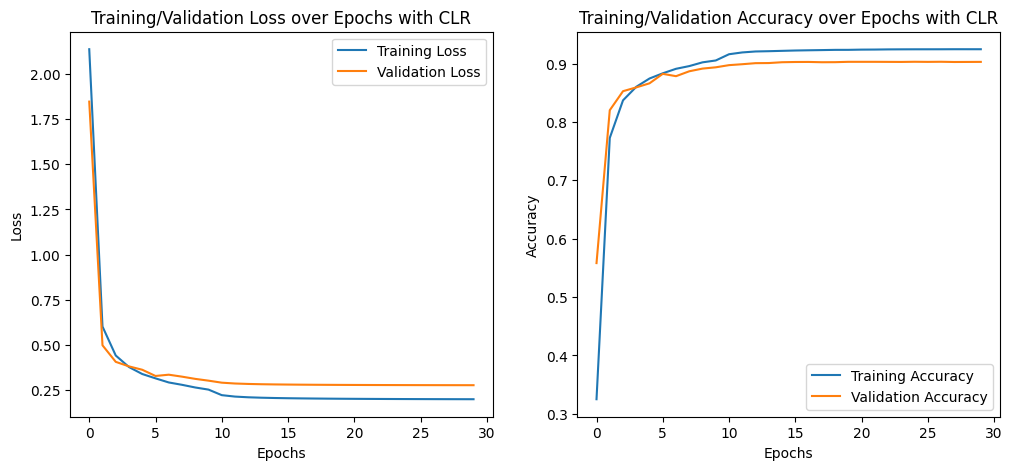

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, callbacks
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

lr_min, lr_max = 1e-5, 1e-2
decay_rate = 0.9

# CLR function with exponential decay
def clr_schedule(epoch):
    cycle = np.floor(1 + epoch / 10)  # Adjust the cycle length as needed
    x = np.abs(epoch / 10 - 2 * cycle + 1)
    base_lr = lr_min + (lr_max - lr_min) * max(0, (1 - x))
    decayed_lr = base_lr * (decay_rate ** epoch)
    return decayed_lr

# Callback for CLR
clr_callback = callbacks.LearningRateScheduler(clr_schedule)

# Compile and train the model
model = create_lenet5()
model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=30, batch_size=64, validation_data=(x_test, y_test), callbacks=[clr_callback])

# Plot training/validation loss
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training/Validation Loss over Epochs with CLR")
plt.legend()

# Plot training/validation accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Training/Validation Accuracy over Epochs with CLR")
plt.legend()

plt.show()

### 3 We want to test if increasing batch size for a fixed learning rate has the same effect as decreasing learning rate for a fixed batch size. Fix the learning rate to lrmax and train your network starting with batch size 32 and incrementally going up to 4096 (each time by the power of 2; i.e. 25,26,...,212). You can choose a step size (in terms of the number of epochs) to increment the batch size. Plot the training loss vs. log2(batch size). Is the generalization of your final model similar to or different from than cyclical learning rate policy? Briefly discuss your observations. (8)

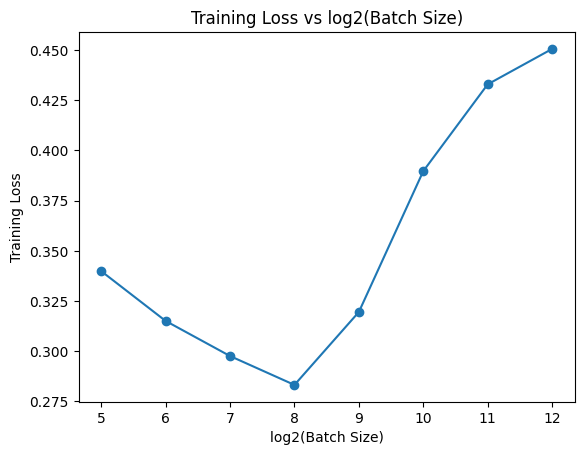

In [ ]:

#Initialize parameters
initial_batch_size = 32
max_batch_size = 4096
epochs_per_batch_size = 5
batch_sizes = [2**i for i in range(5, 13)]  # 32, 64, ..., 4096

# Track training loss for each batch size
training_losses = []

# Train the model for each batch size
for batch_size in batch_sizes:
    model = create_lenet5()
    model.compile(optimizer=keras.optimizers.Adam(learning_rate=lr_max),
                  loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    # Train the model and store the final training loss
    history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs_per_batch_size, verbose=0)
    training_losses.append(history.history['loss'][-1])

# Plot training loss vs log2(batch_size)
plt.plot(np.log2(batch_sizes), training_losses, marker='o')
plt.xlabel('log2(Batch Size)')
plt.ylabel('Training Loss')
plt.title('Training Loss vs log2(Batch Size)')
plt.show()

It is different from than cyclical learning rate policy.   As the batch size increases,  the training loss may initially decrease and then stabilize or increase whihc is a conflict. As you can see, Training losses gradually decrease as the batch size increases from a small value to 8, but later, when the batch size continues to increase, training losses rise significantly, suggesting that larger batch sizes may lead to model underfitting.